# Initial EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"D:\copy of htdocs\practice\Python\300 Days         [ NLP ...... ]\Day 208 NLP_Day8\train.csv")
df.shape

(404290, 6)

In [3]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
261075,261075,377131,377132,How do I overcome trust issues with friends?,How do I overcome trust issues in my life?,0
226064,226064,158633,64793,Is there a Drug and Alcohol Rehab Center in Di...,Is there a Drug and Alcohol Rehab Center in Si...,0
7354,7354,14369,14370,Who is the next Michael Jackson?,Who is going to be the next Michael Jackson?,1
373201,373201,503976,503977,What is the difference between the Manchu and ...,Why was the Queue Order enforced on Han Chines...,0
345416,345416,473707,473708,What countries owe the U.S. money?,If the U.S. Government owes most of the money ...,0
325600,325600,71125,187881,What's the best way to buy a good second hand ...,How do you buy a used car?,1
339986,339986,284492,287401,Do most people get Alzheimer's disease in thei...,Do most people get Alzheimer's disease?,1
11518,11518,22237,22238,What is Digital signal processing?,What are the applications of digital signal pr...,0
12821,12821,24666,24667,Is there any scope for an electronics engineer...,What is the scope of electronics engineering?,0
56976,56976,499,6580,How will the implementation of GST bill impact...,How do GST bill will benefit local people?,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [5]:
# missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [6]:
# duplicate rows
df.duplicated().sum()

0

is_duplicate
0    255027
1    149263
Name: count, dtype: int64
is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

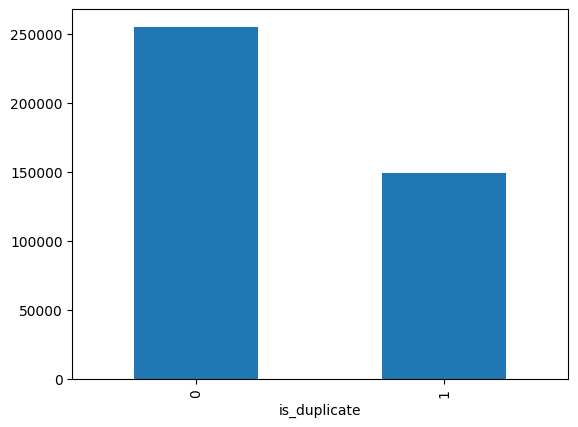

In [7]:
# Distribution of duplicate and non-duplicate questions

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [8]:
# Repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 537933
Number of questions getting repeated 111780


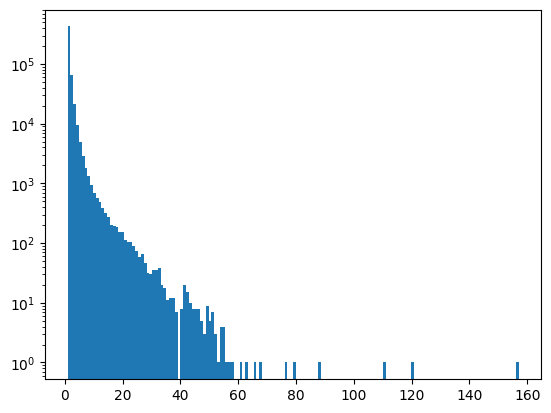

In [9]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()